In [26]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 16):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


### **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list. 

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line


### **Finding Contours as per usual**

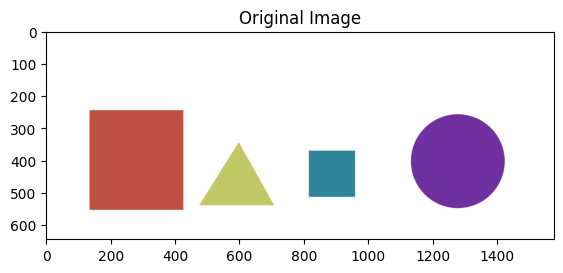

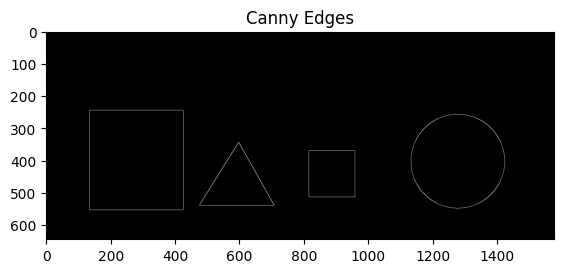

Number of contours found =  4


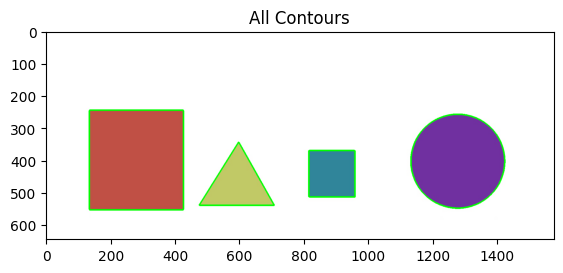

In [27]:
# Load our image
image = cv2.imread('.././images/bunchofshapes.jpg')
imshow('Original Image', image)

# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
imshow('Canny Edges', edged)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found = ", len(contours))

# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
imshow('All Contours', image)

In [28]:
contours[0]

array([[[817, 370]],

       [[816, 371]],

       [[815, 371]],

       ...,

       [[820, 370]],

       [[819, 370]],

       [[818, 370]]], dtype=int32)

## **Sorting by Area using cv2.ContourArea and cv2.Moments**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/moments.png)

Contor Areas before sorting...
[20587.5, 22901.5, 66579.5, 90222.0]
Contor Areas after sorting...
[90222.0, 66579.5, 22901.5, 20587.5]


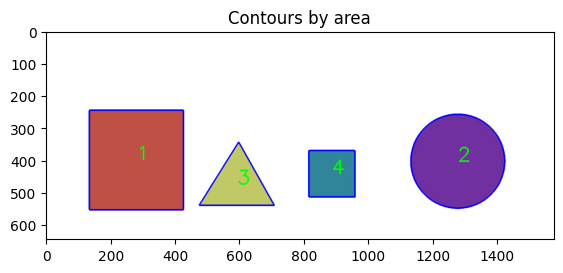

In [29]:
import cv2
import numpy as np

# Function we'll use to display contour area

def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
image = cv2.imread('.././images/bunchofshapes.jpg')

# Let's print the areas of the contours before sorting
print("Contor Areas before sorting...")
print(get_contour_areas(contours))

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Contor Areas after sorting...") 
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow('Contours by area', image)

#### **Define some functions we'll be using**

In [30]:
# Functions we'll use for sorting by position
def x_cord_contour(contours):
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
    
def label_contour_center(image, c):
    """Places a red circle on the centers of contours"""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

#### **We use Moments to Calculate the Center and then use the X Cordinate to sort from left to right**

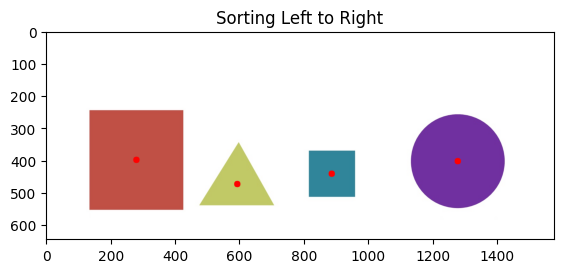

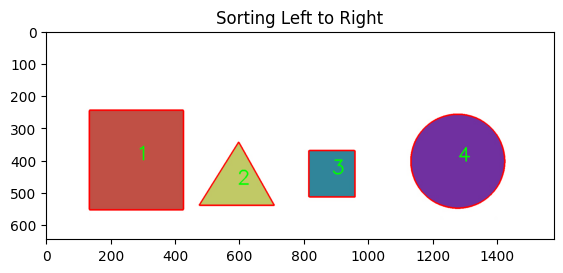

In [31]:
# Load our image
image = cv2.imread('.././images/bunchofshapes.jpg')
orginal_image = image.copy()

# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
 
# Showing the Contour centers
imshow("Sorting Left to Right", image)

# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    (x, y, w, h) = cv2.boundingRect(c)  

imshow('Sorting Left to Right', orginal_image)

## **Approximating Contours using ApproxPolyDP**

### **Using ApproxPolyDP to approximate contours as a more defined shape**
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.


***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


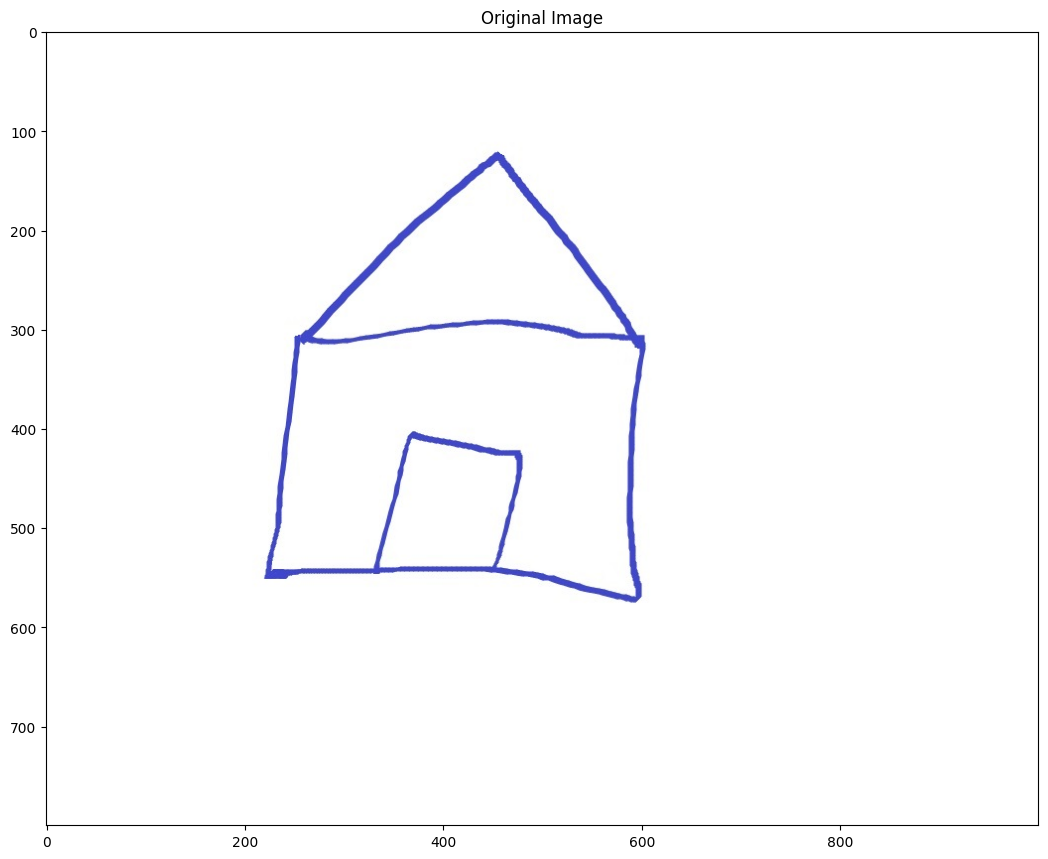

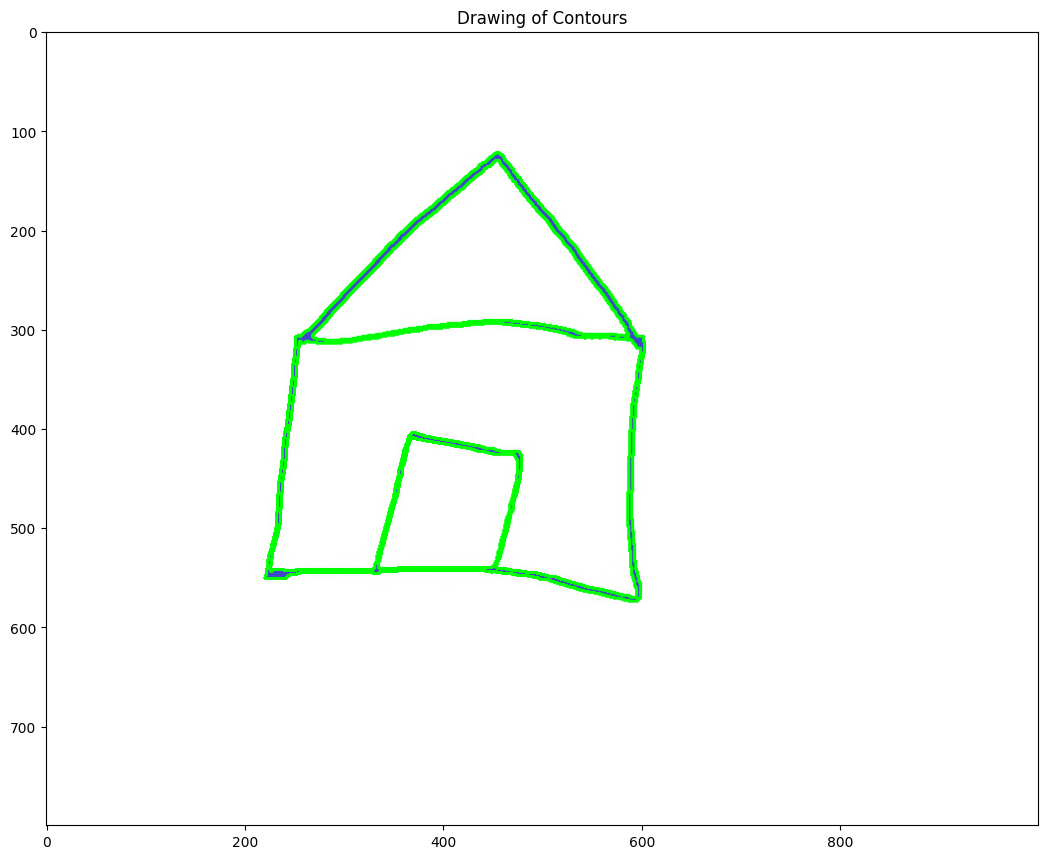

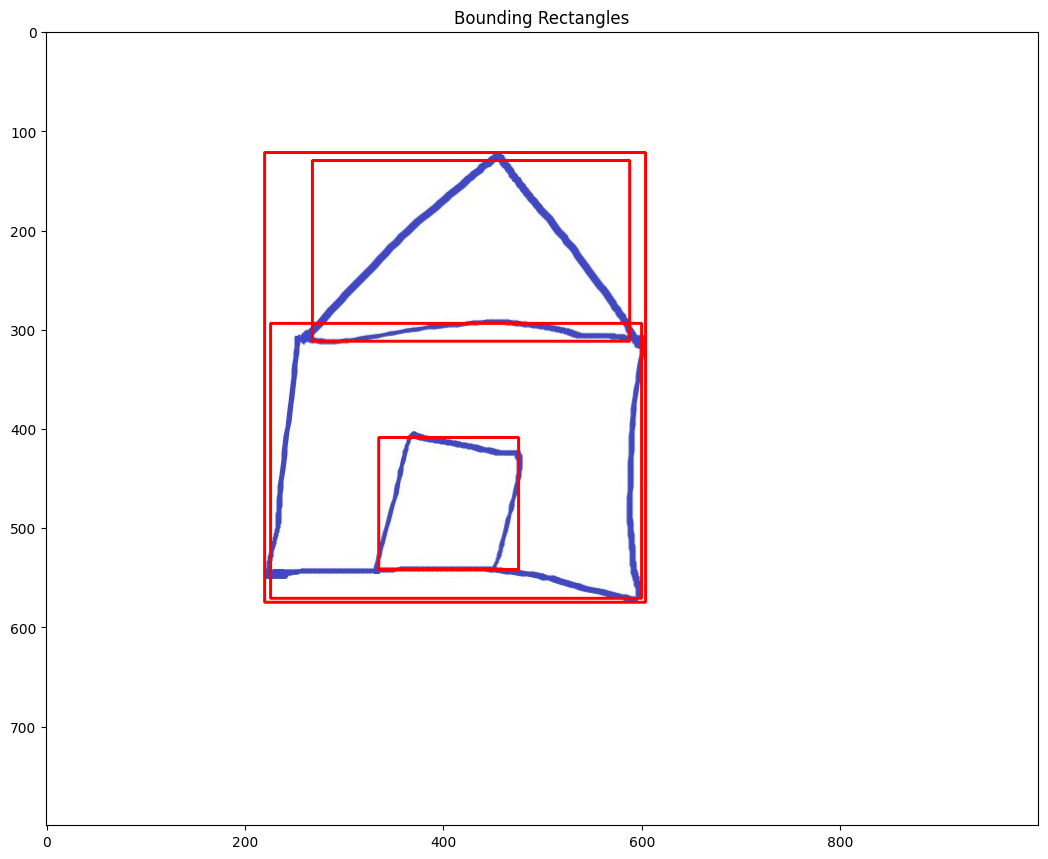

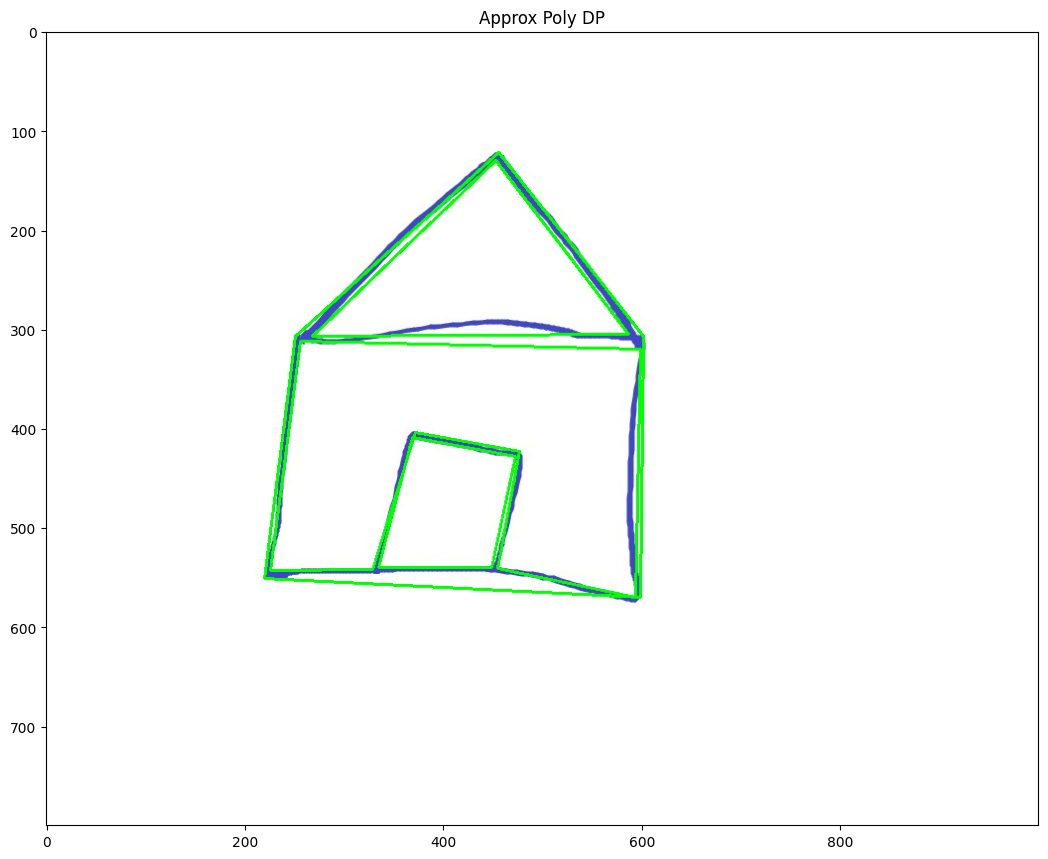

In [32]:
import numpy as np
import cv2

# Load image and keep a copy
image = cv2.imread('.././images/house.jpg')
orig_image = image.copy()
imshow('Original Image', orig_image)
 
# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

# Iterate through each contour 
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

imshow('Drawing of Contours', image)
imshow('Bounding Rectangles', orig_image)
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

imshow('Approx Poly DP', copy)

## **Convex Hull**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/convex.png)

Convex Hull will look similar to contour approximation, but it is not (Both may provide the same results in some cases). 

The cv2.convexHull() function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours

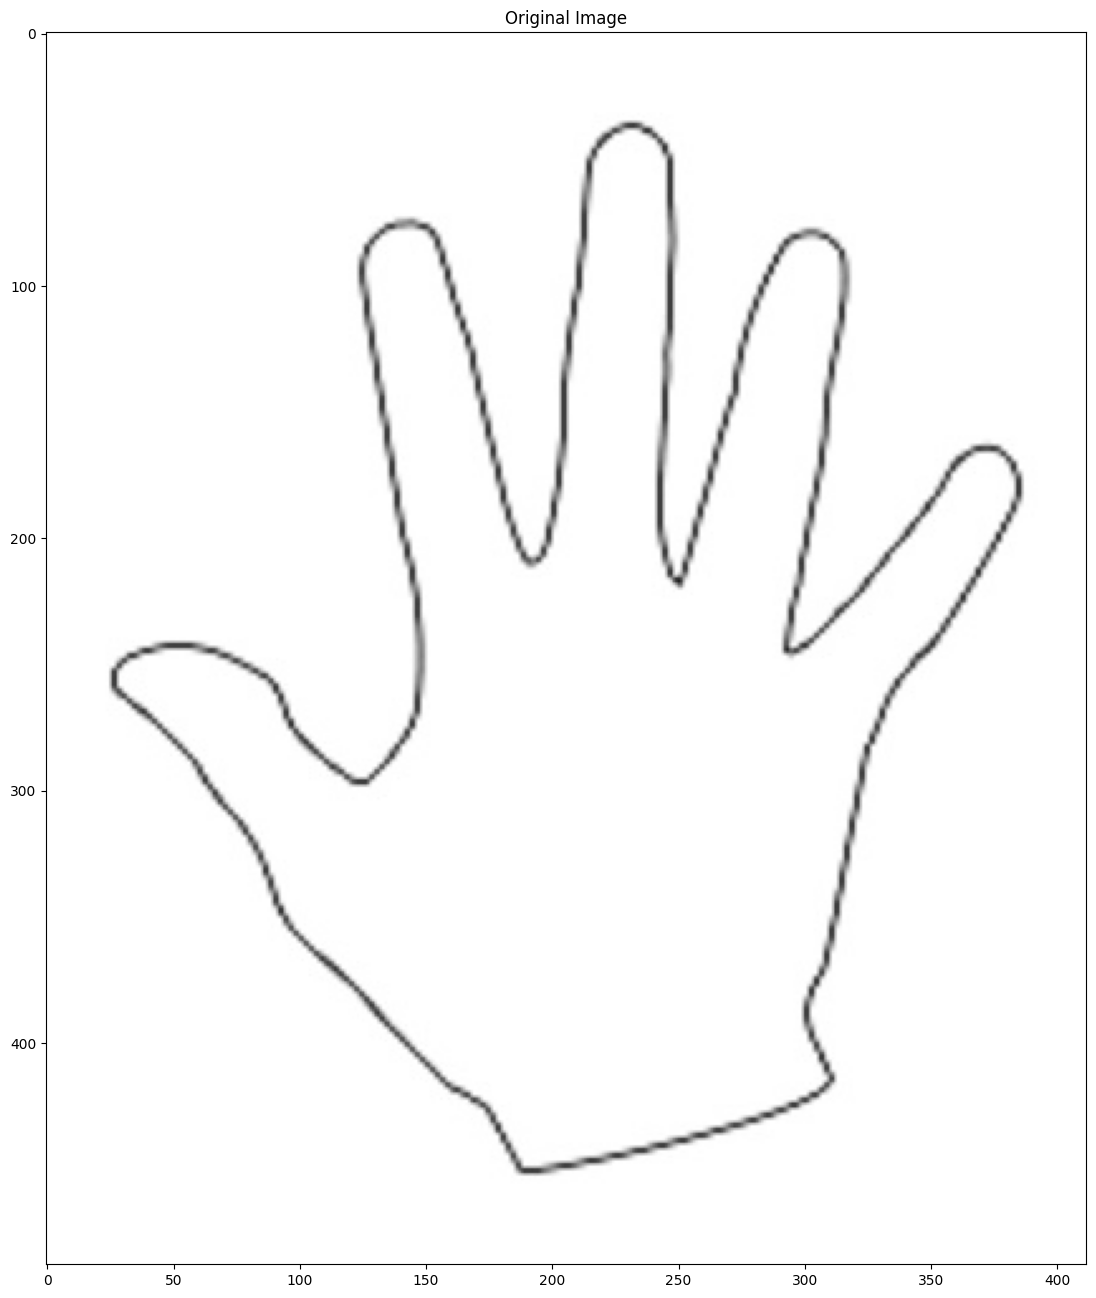

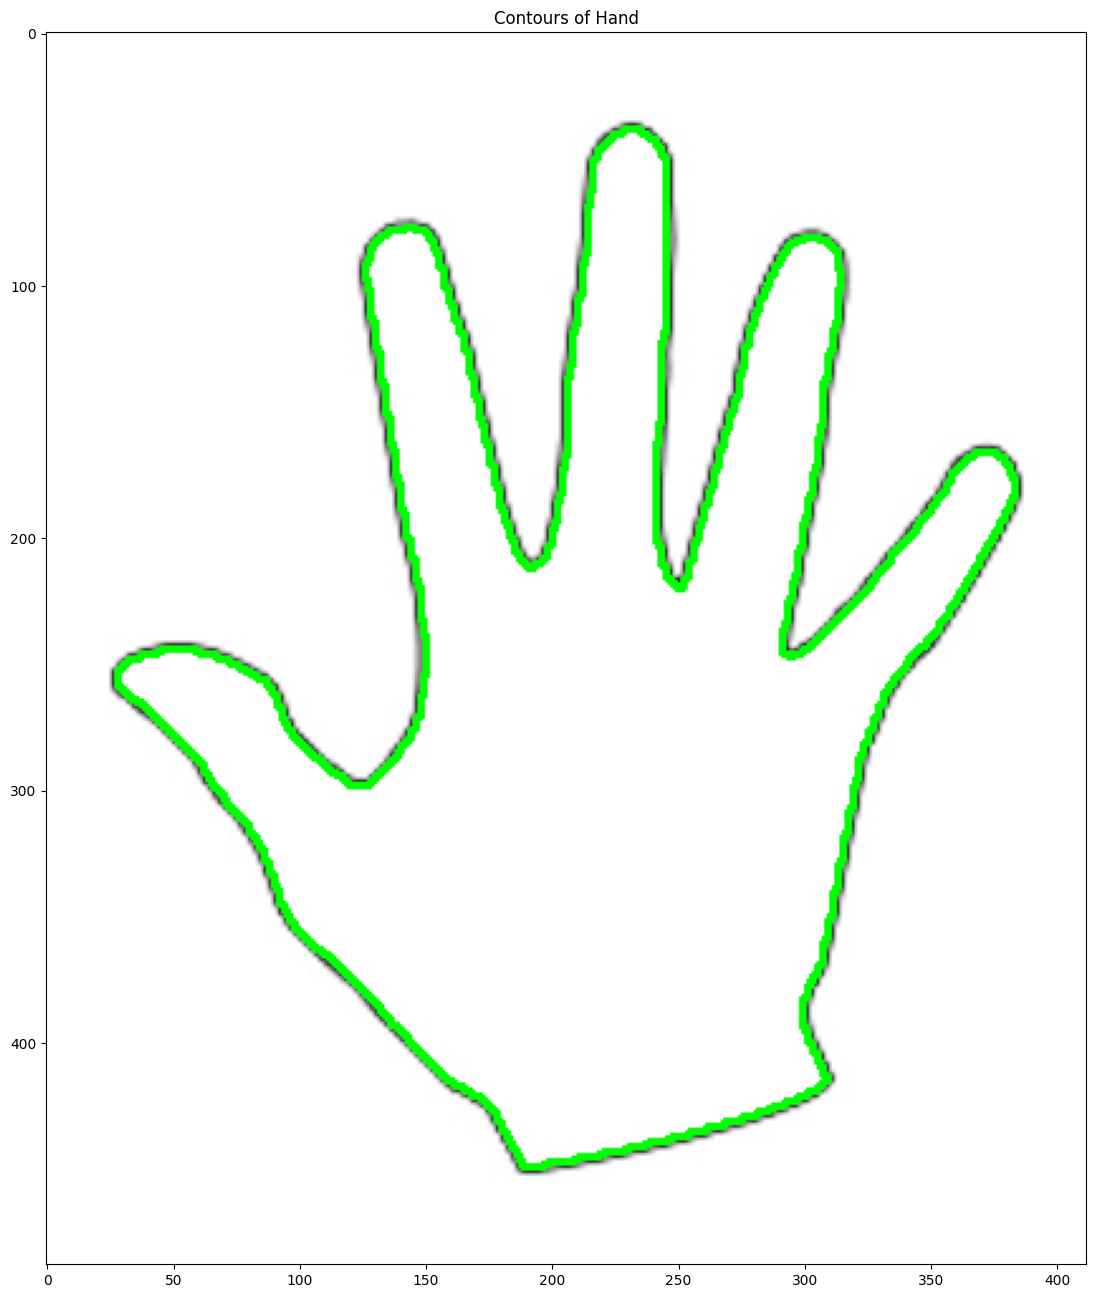

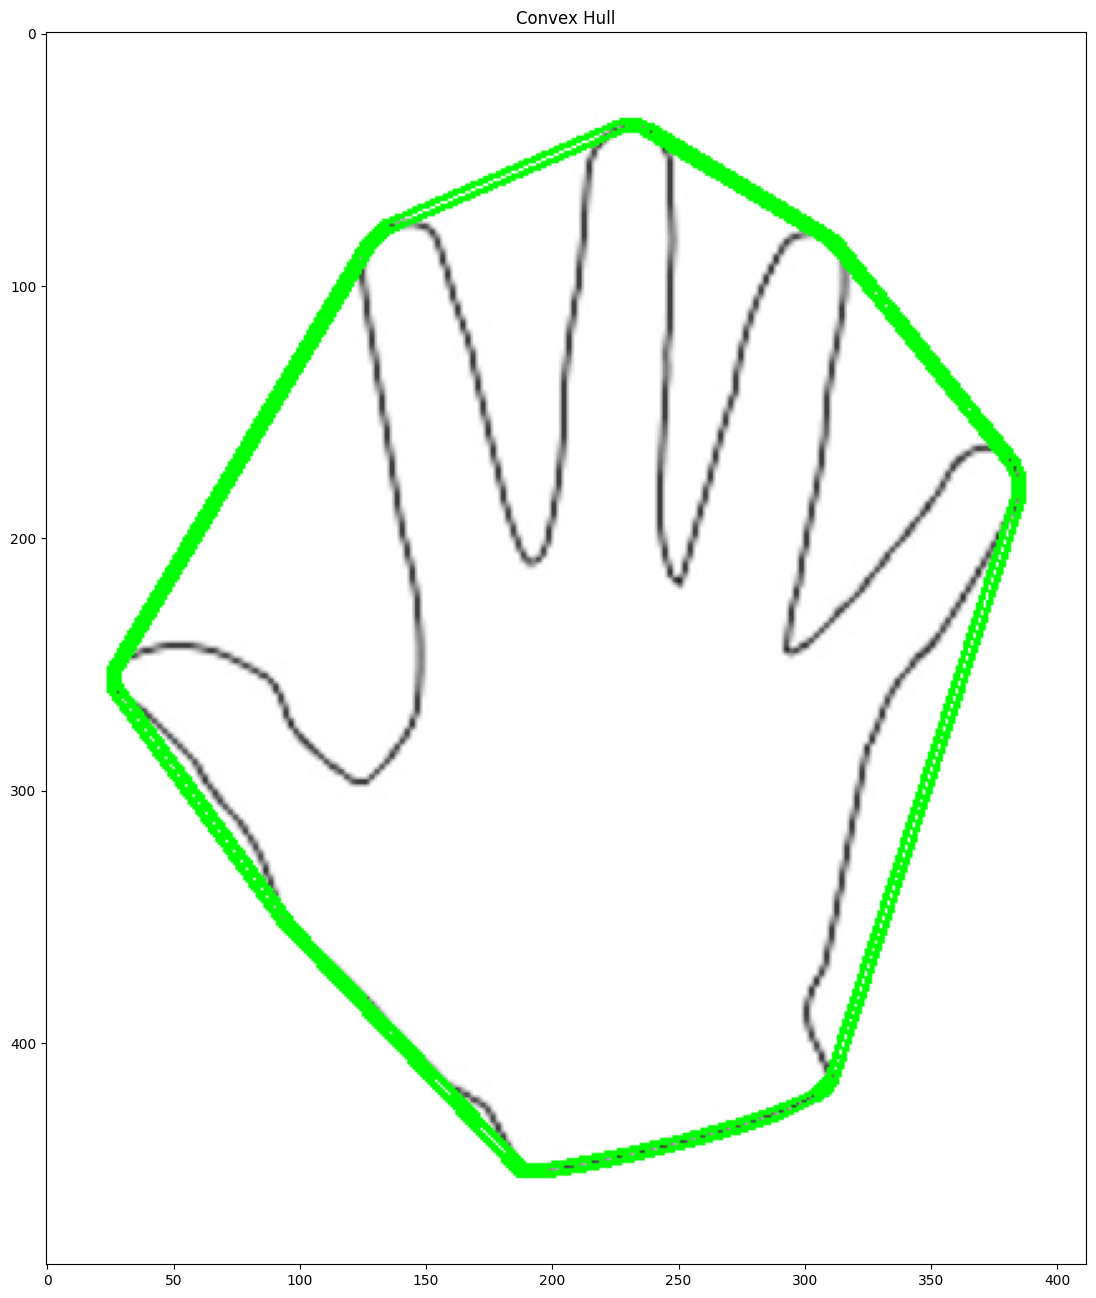

In [33]:
import numpy as np
import cv2

image = cv2.imread('.././images/hand.jpg')
orginal_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow('Original Image', image)

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, 0, (0, 255, 0), 2)
imshow('Contours of Hand', image)


# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(orginal_image, [hull], 0, (0, 255, 0), 2)
    
imshow('Convex Hull', orginal_image)